# **Proyecto final - Análisis de popularidad en canciones de Spotify**





##**-Integrantes:**

***Equipo***

-Garnica Martínez, Tania Fabiola

-Prandini, Santiago

-Vadra, Sebastián

***Comisión 29730, Coderhouse Data Science***

`-Profesor:` Damián Dapueto

`-Tutor:` Fernando Trujillo Arévalo

##**-Tema de investigación**

* Ninguna empresa u organización ha avanzado tanto en la tarea de representar cuantitativamente a la música como Spotify.

* Con una participación en el mercado del 36% para el 2018, cuenta con un almacén de datos muy superior al del resto de sus competidores.

* A partir de esta base de datos con canciones que fueron top entre 1998 y 2020, se busca conocer si existe un algoritmo capaz de predecir la popularidad que tendrá una canción a través de sus atributos

* En caso de tener éxito, se analizará aquellos factores que hacen que una canción sea popular.

##**-Historia de los datos**

* Este conjunto de datos contiene estadísticas de audio de las 2000 mejores pistas en Spotify de 2000 a 2019. 

* Los datos contienen alrededor de 18 columnas, cada una de las cuales describe la pista y sus cualidades.

* Los datos fueron obtenidos de la empresa Kaggle

##**-Problema específico de la investigación**

***Hipótesis:***

* Mediante el análisis y la transformación de los distintos atributos de las canciones, se podrá predecir con cierta confianza el rango de popularidad de una canción, y con un error más elevado su popularidad exacta. 

##**-Objetivos**

***Objetivo general:***

* Comprobar la factibilidad de predecir la popularidad de una canción mediante sus atributos

***Objetivo específicos:***

* Analizar cómo impactan los atributos de una canción en su popularidad, para las canciones top entre 2000 y 2019.
* Realizar un análisis exploratorio sobre distintas características de las canciones.
* Comprender si existen cambios generales a través de los años en los atributos de las canciones top
* Dar sustento meteodológico a los distintos algoritmos utilizados en el proyecto

##**-Preguntas de investigación**

***Pregunta general:***

* ¿Se puede predecir la popularidad de una canción?

***Preguntas específicas:***

* ¿Cómo impactan los atributos de una canción en su popularidad?
* ¿Existen cambios generales a través de los años en los atributos de las canciones top?

##**-Fuente de los datos**

* Los datos fueron obtenidos de la plataforma de Data Science Kaggle

  https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

##**-Primera vista de la base de datos**

* Importamos la librería pandas para cargar el dataset

In [1]:
import pandas as pd

songs = pd.read_excel('songs_normalize.xlsx')

songs

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5444.0,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4918.0,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9007.0,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4063.0,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4806.0,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5065.0,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1995,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5707.0,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1996,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8635.0,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1997,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7513.0,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


##**-Descripción de variables**

•	`artist:` nombre del Artista.

•	`song:` nombre de la Pista.

•	`duration_ms:` duración de la pista (milisegundos)

•	`explicit:` canción inadecuada para menores (0=no, 1=sí)

•	`year:` año de lanzamiento de la pista.

•	`popularity:` mide la popularidad de la canción según cantidad de veces escuchada, pondera las escuchadas más recientemente (de 0 a 100)

•	`danceability:` describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales (de 0 a 1)

•	`energy:` representa una medida de intensidad y actividad (de 0 a 1)

•	`key:` representa la nota en la que se encuentra la pista (Do=0, Do#=1, Re=2, Re#=3, Mi=4, Fa=5, Fa#=6, Sol=7, Sol#=8, La=9, La#=10, Si=11)

•	`loudness:` volumen general de una pista(en decibelios dB) 

•	`mode:` indica la modalidad (mayor o menor) de una pista (mayor=1, menor=0)

•	`speechiness:` detecta la presencia de palabras habladas en una pista (de 0 a 1)

•	`acousticness:` una medida de confianza de si la pista es acústica (de 0 a 1)

•	`instrumentalness:` representa si una pista no contiene voces (de 0 a 1)

•	`liveness:` detecta la presencia de una audiencia en la grabación (de 0 a 1)

•	`valence:` describe la positividad musical transmitida por una pista (de 0 a 1)

•	`tempo:` indica el tempo general estimado de una pista (en BPM: pulsaciones por minuto)

•	`genre:` género de la pista.


#**----------------------------------------------------------------------------------------------------**

#**-Limpieza de los datos**

* Los datos obtenidos de la base de datos de kaggle tuvieron que ser modificados en una fila que traía una columna corrida, y la columna que corresponde a tempo tuvo que ser corregida ya que tenía valroes con la coma corrida

#**----------------------------------------------------------------------------------------------------**

#**-Librerías utilizadas en el trabajo**

In [2]:
#para el tratamiento de datos

import numpy as np
import pandas as pd

#para gráficos

import matplotlib.pyplot as plt
import seaborn as sns

#para preproceso y modelado

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder


#**----------------------------------------------------------------------------------------------------**

##**Análisis exploratorio**

* Vemos el conjunto de datos

In [3]:
songs

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5444.0,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4918.0,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9007.0,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4063.0,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4806.0,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5065.0,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1995,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5707.0,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1996,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8635.0,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1997,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7513.0,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


* Usamos .info para ver la cantidad de registros con los que cuenta nuestro dataset, los tipos de variable de cada columna, y la existencia o no de nulos

In [4]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1999 non-null   object 
 1   song              1999 non-null   object 
 2   duration_ms       1999 non-null   int64  
 3   explicit          1999 non-null   bool   
 4   year              1999 non-null   int64  
 5   popularity        1999 non-null   int64  
 6   danceability      1999 non-null   float64
 7   energy            1999 non-null   float64
 8   key               1999 non-null   int64  
 9   loudness          1999 non-null   float64
 10  mode              1999 non-null   int64  
 11  speechiness       1999 non-null   float64
 12  acousticness      1999 non-null   float64
 13  instrumentalness  1999 non-null   float64
 14  liveness          1999 non-null   float64
 15  valence           1999 non-null   float64
 16  tempo             1999 non-null   float64


* Nuestro dataset cuenta con 1999 registros y 18 columnas. 

* No contamos con valores nulos en ninguna de las columnas

* Contamos con 5 variables categóricas: artist,
 song,
 genre,
 key,
 year (estas últimas figuran como numéricas)

* Contamos con 2 variables booleanas: mode,
explicit

* Contamos con 11 variables numéricas: duration_ms, popularity, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo       


In [5]:
songs['key'] = songs['key'].astype('object')
songs['mode'] = songs['mode'].astype('bool')


* Usamos .describe para ver las estadísticas de nuestras columnas numéricas, también usamos .T para tener una mejor visión de los resultados

In [6]:
songs.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
artist,1999,835,Rihanna,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
song,1999,1878,Sorry,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,1999.0,NaN,NaN,NaN,228753.857429,39145.52171,113000.0,203560.0,223293.0,248133.0,484146.0
explicit,1999,2,False,1448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1999.0,NaN,NaN,NaN,2009.490245,5.859019,1998.0,2004.0,2010.0,2015.0,2020.0
popularity,1999.0,NaN,NaN,NaN,59.865433,21.338574,0.0,56.0,65.0,73.0,89.0
danceability,1999.0,NaN,NaN,NaN,0.667419,0.140449,0.129,0.581,0.676,0.764,0.975
energy,1999.0,NaN,NaN,NaN,0.720297,0.152752,0.0549,0.622,0.736,0.839,0.999
key,1999.0,12.0,1.0,267.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,1999.0,NaN,NaN,NaN,-4993.74414,2429.466358,-20514.0,-6339.0,-5077.0,-3837.5,-0.276


* Contamos con muchos valores únicos en dos de nuestras variables categóricas: artist y song, muchos más en la segunda que en la primera.

* Observamos que nuestra variable target 'popularity' tiene un desvío estandar muy alto

* Las variables duration_ms, danceability, energy, loudness, valence y tempo cuentan con una media y una mediana muy similares

* Las variables speechiness, acousticness, instrumentalness y liveness por su parte parecen tener distribuciones más sesgadas

* Como nuestro objetivo es predecir la popularidad de las canciones, comenzamos por analizar la distribución de nuestra variable target realizando un histograma

Text(0, 0.5, 'Frequency')

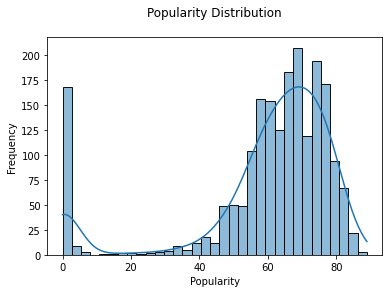

In [7]:
sns.histplot(data=(songs['popularity']), kde=True )

plt.title('Popularity Distribution\n')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

* De la distribución de nuestra variable target vemos que tenemos muchos valores con 0, lo que hace que la curva no tome una forma clara. Desde el valor 40 al máximo (89) se asemeja a una distribución normal. También es para destacar las pocas canciones con popularidad alta (>85)

* Realizamos un boxplot de la variable popularity para chequear la existencia de outliers

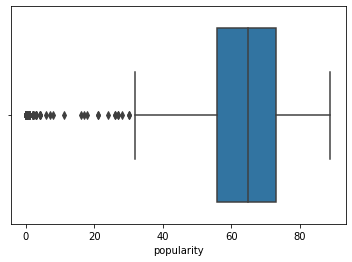

In [8]:
sns.boxplot(x=songs['popularity'])

* Realizamos un gráfico de barras para chequear los valores de popularity que más se repiten en el dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

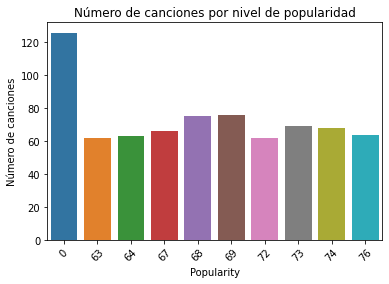

In [9]:
sns.barplot(songs['popularity'].value_counts().head(10).index, songs['popularity'].value_counts().head(10))
plt.title('Número de canciones por nivel de popularidad')
plt.xlabel('Popularity')
plt.ylabel('Número de canciones')
plt.xticks(rotation=45)

* Vemos que el 0 es el valor de 'popularity' que más se repite en el dataset, seguido por los valores de 68 y 69. Las canciones con popularity '0' representan un poco más del 6% del conjunto de datos


* En base a la información obtenida de los gráficos vamos a eliminar los valores de popularity menores a 15 en el dataset por ser outliers.

In [10]:
songs = songs.drop(songs.index[songs['popularity']<15])
songs.shape

(1818, 18)

* Nuestro conjunto se reduce 181 registros

* Realizamos un pairplot para ver la relación entre algunas de las variables numéricas y sus distribuciones

Text(0.5, 1.02, 'Grafico de puntos en variables numericas')

<Figure size 1440x1440 with 0 Axes>

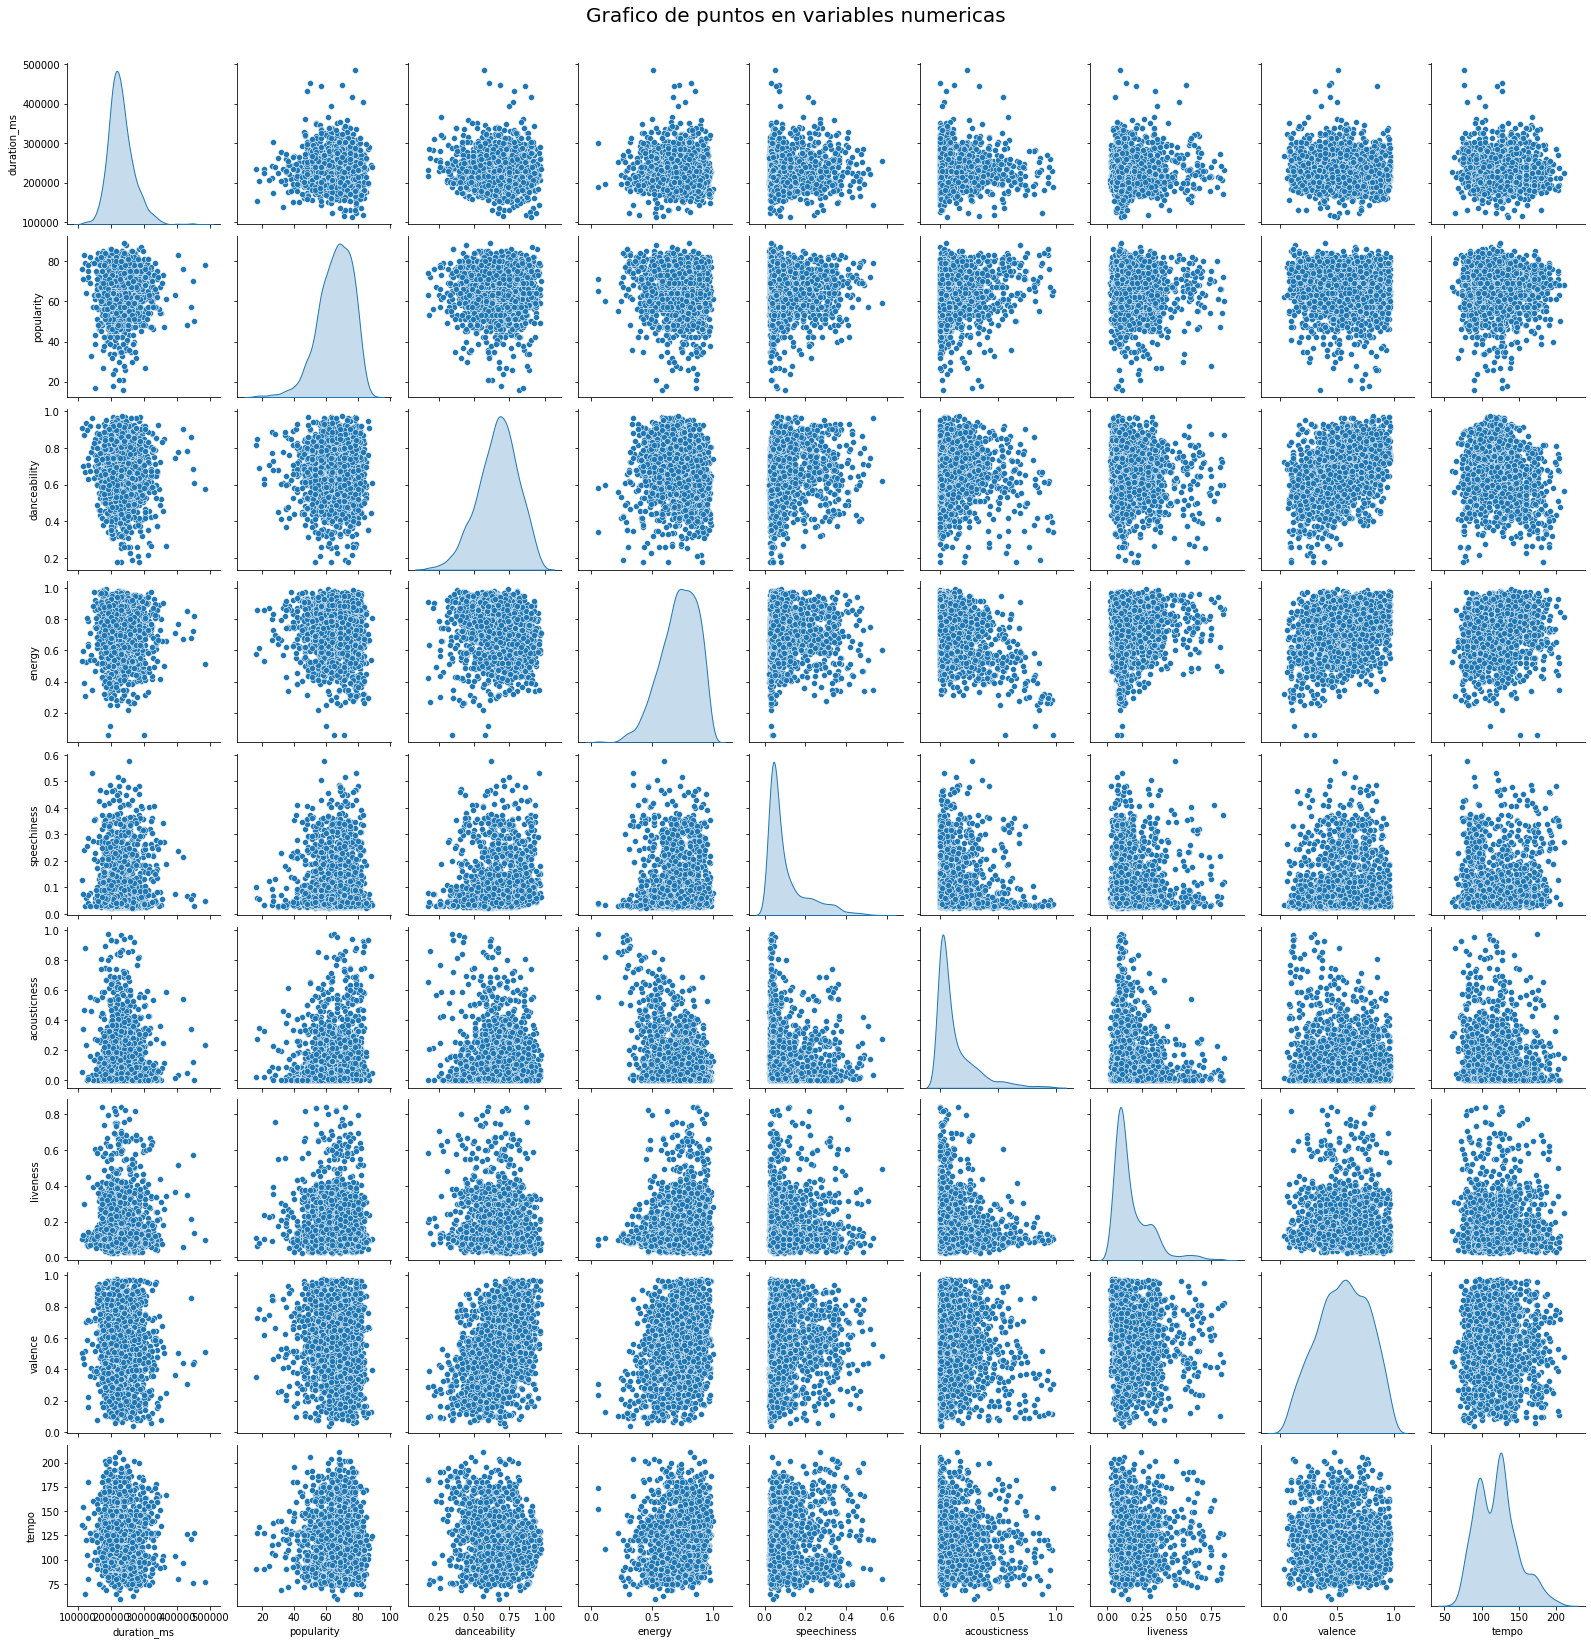

In [11]:
plt.figure(figsize=(20, 20))

g = sns.pairplot(songs[['duration_ms', 'popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']], diag_kind='kde');

g.fig.suptitle("Grafico de puntos en variables numericas", fontsize=20, y=1.02)

* En esta primera instancia no salen a la luz relaciones lineales claras entre nuestras variables numéricas

* Realizamos un barplot para ver cuáles son los artistas con más canciones en nuetsro dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

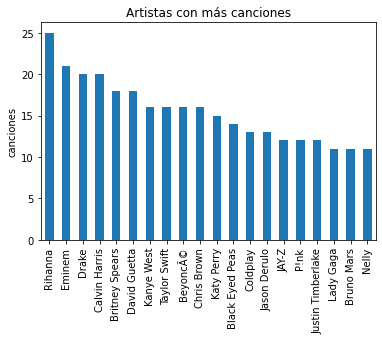

In [12]:
songs['artist'].value_counts().head(20).plot(kind='bar')
plt.title('Artistas con más canciones')
plt.ylabel('canciones')
plt.xticks(rotation = 90)

* Para poder aprovechar la columna artista, vamos a reemplazarla por un label que indique cuántas canciones tiene en el dataset el artista en cuestión

In [13]:
#creamos un dataframe que indique la cantidad de canciones por artista
suma_canciones = pd.DataFrame(songs['artist'].value_counts())
suma_canciones


,artist
Rihanna,25
Eminem,21
Drake,20
Calvin Harris,20
Britney Spears,18
...,...
E-40,1
Cassie,1
Infernal,1
Cherish,1


In [14]:
#renombramos la columna artist como 'total de canciones'
suma_canciones2 = suma_canciones.rename(columns={"artist": "total de canciones"})

suma_canciones2

,total de canciones
Rihanna,25
Eminem,21
Drake,20
Calvin Harris,20
Britney Spears,18
...,...
E-40,1
Cassie,1
Infernal,1
Cherish,1


In [15]:
#cambiamos el index
suma_canciones3 = suma_canciones2.reset_index()

suma_canciones3

,index,total de canciones
0,Rihanna,25
1,Eminem,21
2,Drake,20
3,Calvin Harris,20
4,Britney Spears,18
...,...,...
780,E-40,1
781,Cassie,1
782,Infernal,1
783,Cherish,1


In [16]:
#renombramos la columna index como 'artist'
suma_canciones4 = suma_canciones3.rename(columns={"index": "artist"})

suma_canciones4

,artist,total de canciones
0,Rihanna,25
1,Eminem,21
2,Drake,20
3,Calvin Harris,20
4,Britney Spears,18
...,...,...
780,E-40,1
781,Cassie,1
782,Infernal,1
783,Cherish,1


In [17]:
#realizamos un merge entre nuestro dataset original y el de la suma de cancioens para obtener en cada row el dato de cuántas canciones tiene en total el artista en cuestión
songs = songs.merge(suma_canciones4,
                                                on='artist')

songs

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,total de canciones
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5444.00,False,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,18
1,Britney Spears,Born to Make You Happy,243533,False,1999,58,0.633,0.922,11,-4842.00,False,0.0454,0.1160,0.000465,0.0710,0.686,84.110,pop,18
2,Britney Spears,Lucky,206226,False,2000,65,0.765,0.791,8,-5707.00,True,0.0317,0.2620,0.000154,0.0669,0.966,95.026,pop,18
3,Britney Spears,I'm a Slave 4 U,203600,False,2001,69,0.847,0.843,5,-3579.00,False,0.1060,0.4150,0.000134,0.1070,0.963,110.027,pop,18
4,Britney Spears,Overprotected - Radio Edit,198600,False,2001,61,0.682,0.894,0,-1.73,False,0.0727,0.0381,0.000000,0.4160,0.845,95.992,pop,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,Sech,Otro Trago,225933,True,2019,71,0.746,0.700,0,-4669.00,True,0.3410,0.1360,0.000159,0.1100,0.619,176.044,latin,1
1814,NSG,Options,240081,True,2020,57,0.836,0.621,1,-4684.00,False,0.0894,0.3890,0.000092,0.1040,0.762,101.993,"World/Traditional, hip hop",1
1815,Normani,Motivation,193837,False,2019,71,0.599,0.887,4,-3967.00,True,0.0984,0.0192,0.000001,0.3000,0.881,170.918,"pop, R&B",1
1816,Joel Corry,Sorry,188640,False,2019,63,0.744,0.790,8,-4617.00,False,0.0562,0.0547,0.000802,0.3200,0.847,125.002,"pop, Dance/Electronic",1


In [18]:
songs["rango canciones"] = pd.cut(songs["total de canciones"], 
                                                bins=[0,4,9,np.inf],
                                                labels=['0-4','5-9','10+'])

In [19]:
songs['rango canciones'] = songs['rango canciones'].astype('object')

* Realizamos un barplot con las canciones que mayor "popularity" obtuvieron

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


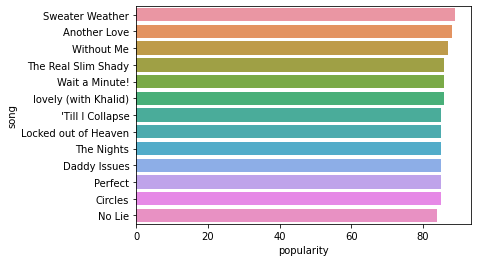

In [20]:
canciones_populares = songs.nlargest(15, ['popularity']).set_index('song')['popularity']
sns.barplot(canciones_populares, canciones_populares.index)

* Esta variable no va a ser tenida en cuenta a la hora de armar el modelo ya que no encontramos transformación posible para utilizarla

* Realizamos un histplot para ver la distribución de la duracion de las canciones

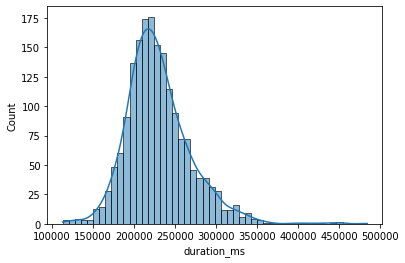

In [21]:
sns.histplot(data=(songs['duration_ms']), kde=True );

* Graficamos el boxplot para duration_ms

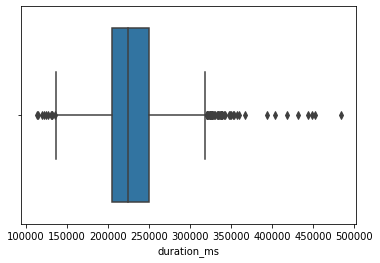

In [22]:
sns.boxplot(x=songs['duration_ms'])

* La distribución de la duración de las canciones se asemeja a una normal, un poco sesgada a la izquierda ya que hay algunas canciones que se acercan a los 5 minutos de duración.

* Eliminamos las canciones que duren más de 380000 segundos. Nuestro conjunto se reduce 8 registros

In [23]:
songs = songs.drop(songs.index[songs['duration_ms']>380000])
songs.shape 

(1810, 20)

* Comparamos ahora en un mismo gráfico la distribción de la variable duración con nuestra variable target "popularity"

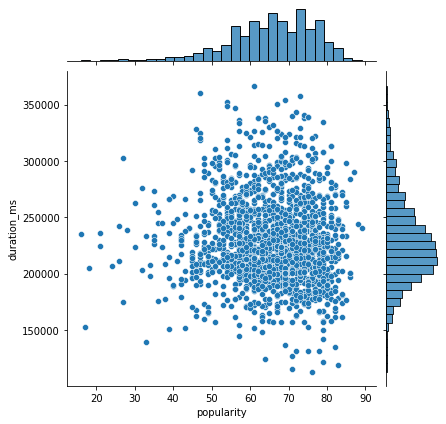

In [24]:
sns.jointplot(x = 'popularity', y = 'duration_ms', data = songs)

* No parece haber relación clara entre la duración de la canción y la popularidad alcanzada, la gran cantidad de valores con popularidad 0 distorsiona el gráfico

* Chequeamos la distribución de la variable loudness

Text(0, 0.5, 'Frequency')

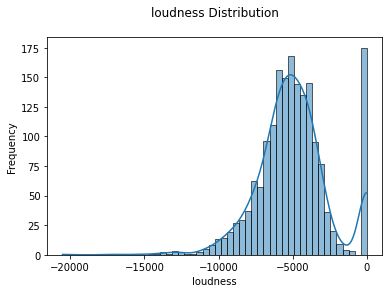

In [25]:
sns.histplot(data=(songs['loudness']), kde=True )

plt.title('loudness Distribution\n')
plt.xlabel('loudness')
plt.ylabel('Frequency')

* Graficamos el boxplot para loudness

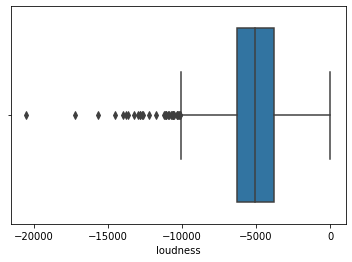

In [26]:
sns.boxplot(x=songs['loudness'])

* Eliminamos los outliers, reduciendo nuestro dataset en 14 registros

In [27]:
songs = songs.drop(songs.index[songs['loudness']<-12000])
songs.shape

(1796, 20)

* Consultamos la distribución de la variable tempo

Text(0, 0.5, 'Frequency')

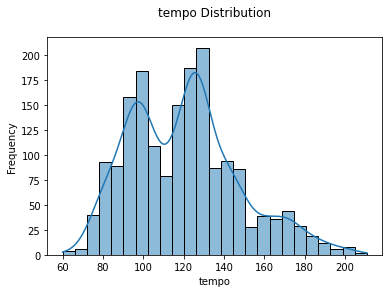

In [28]:
sns.histplot(data=(songs['tempo']), kde=True )

plt.title('tempo Distribution\n')
plt.xlabel('tempo')
plt.ylabel('Frequency')

* Graficamos el boxplot para tempo

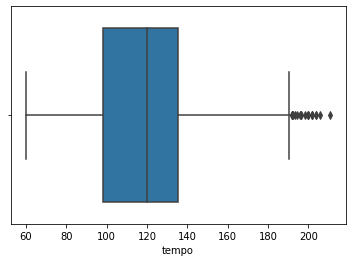

In [29]:
sns.boxplot(x=songs['tempo'])

* No encontramos outliers significativos por lo que no eliminamos ningún registro

* Genereamos un barplot para ver cuales son los géneros que mayor cantidad de canciones presentan en el dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

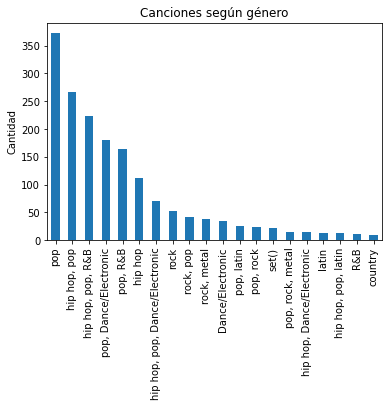

In [30]:
songs['genre'].value_counts().head(20).plot(kind='bar')
plt.title('Canciones según género')
plt.ylabel('Cantidad')
plt.xticks(rotation = 90)

* Creamos una tabla de frecuencia para ver el total de los géneros y su cantidad de canciones en el dataset

In [31]:
#instalamos sidetable para ver la frecuencia por género
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import sidetable
songs.stb.freq(['genre']).sort_values('cumulative_percent')

,genre,count,percent,cumulative_count,cumulative_percent
0,pop,373,20.768374,373,20.768374
1,"hip hop, pop",266,14.810690,639,35.579065
2,"hip hop, pop, R&B",223,12.416481,862,47.995546
3,"pop, Dance/Electronic",181,10.077951,1043,58.073497
4,"pop, R&B",164,9.131403,1207,67.204900
5,hip hop,112,6.236080,1319,73.440980
6,"hip hop, pop, Dance/Electronic",71,3.953229,1390,77.394209
7,rock,53,2.951002,1443,80.345212
8,"rock, pop",42,2.338530,1485,82.683742
9,"rock, metal",38,2.115813,1523,84.799555


* Observamos que 20 de los 59 géneros explican el 95% del dataset, mientras que 32 de los 59 géneros no superan las 4 canciones en el mismo, por lo que tendremos que trabajar sobre esta variable para transformarla o bien no tener en cuenta los géneros en cuestión

* Generamos ahora un barplot para ver cuales son los géneros que mayor popularidad en promedio alcanzan con sus canciones en el dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Popularity')

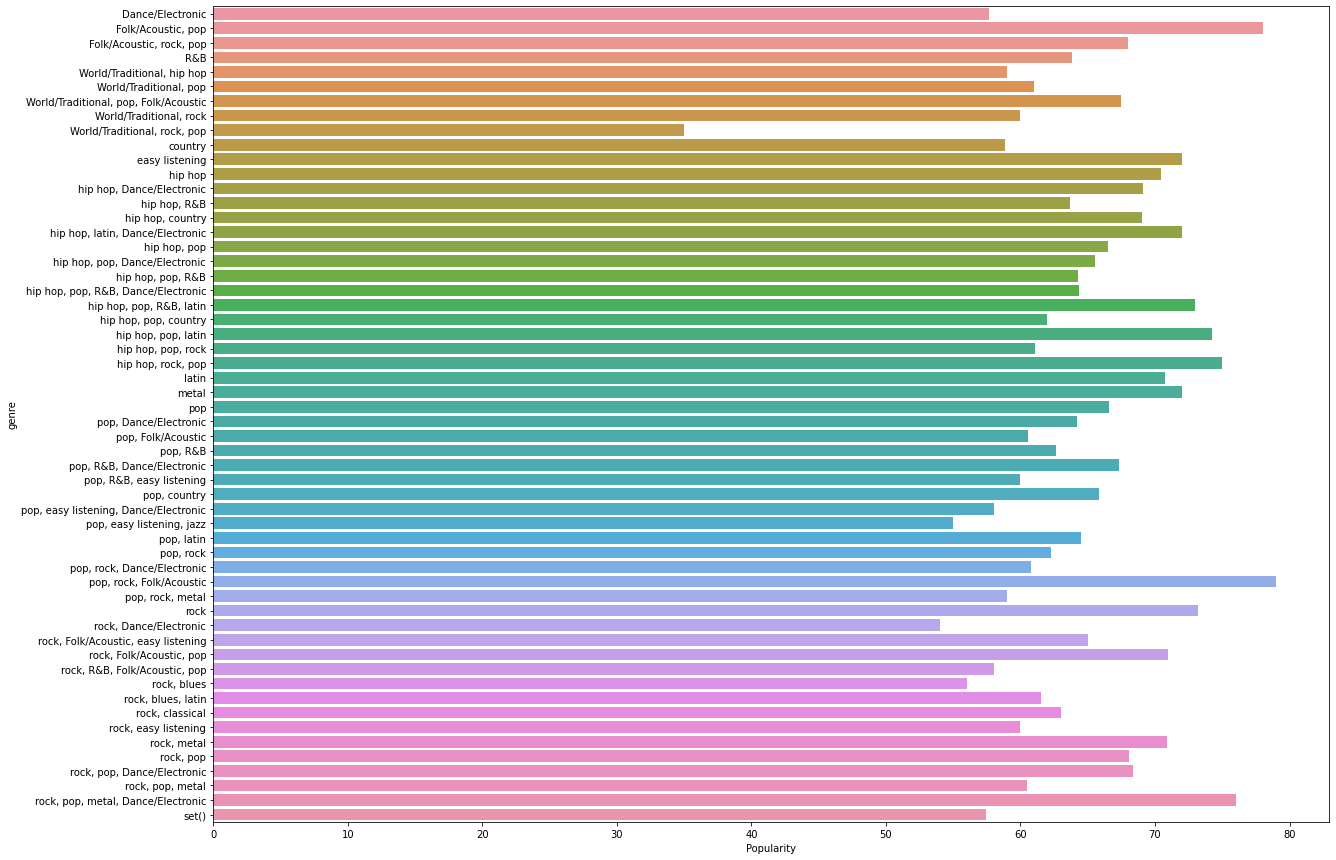

In [33]:
plt.figure(figsize=(20, 15))
genero = songs.groupby('genre')['popularity'].mean().reset_index()
sns.barplot(genero['popularity'], genero.genre, ci = None)
plt.xlabel('Popularity')

* Podemos observar que los 4 géneros que mayor promedio de popularidad tienen en el dataset tienen apenas dos o una canción en el mismo: 'Folk/Acoustic,pop', 'hip hop, rock, pop' , 'pop, rock, folk/acoustic', 'rock, pop, metal, dance/electronic'. A su vez hay dos géneros que su promedio de popularidad es '0': 'folk/acoustic, rock' y 'country,latin' que también cuentan con una sola canción en el dataset

* Trabajamos sobre la variable género para reducir sus valores únicos, nos quedaremos con el primer string en aquellos que son compuestos

In [34]:
songs['first_genre'] = songs['genre'].str.split(',').apply(lambda x: x[0].lower())

* Generamos un gráfico para ver la frecuencia de nuestra nueva columna

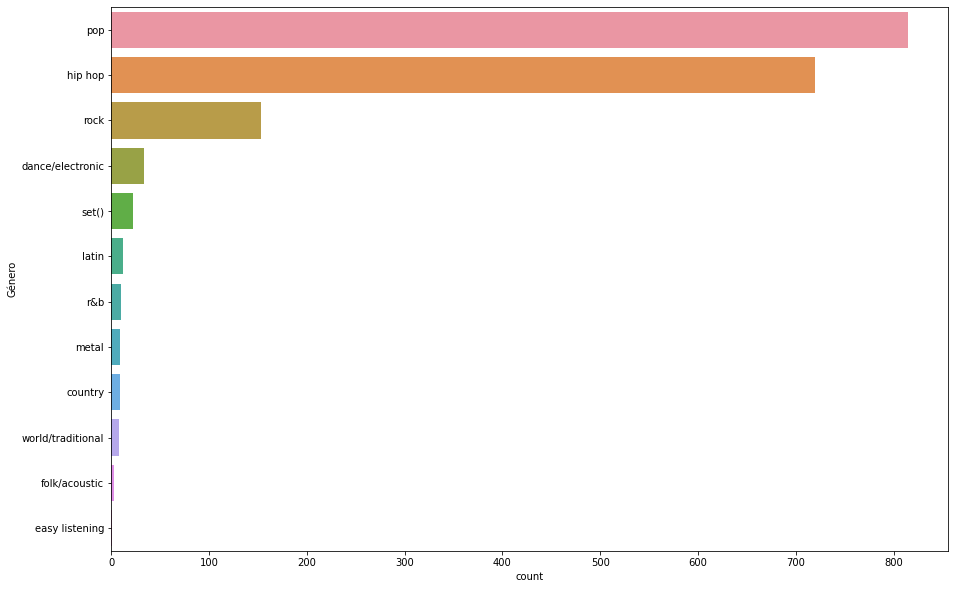

In [35]:
plt.figure(figsize=(15,10))

sns.countplot(y='first_genre', data=songs, order= songs['first_genre'].value_counts().index)
plt.ylabel("Género")

plt.show();

* Eliminamos los dos géneros que menos cantidad de canciones tienen en el dataset

In [36]:
songs = songs.drop(songs.index[songs['first_genre']=='easy listening'])
songs = songs.drop(songs.index[songs['first_genre']=='folk/acoustic'])

* Realizamos un barplot para ver la cantidad de canciones por año que tiene nuestro dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

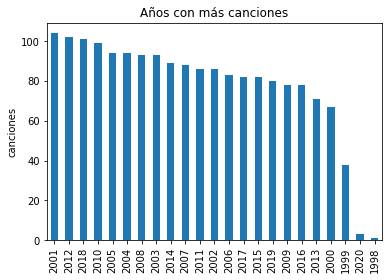

In [37]:
songs['year'].value_counts().plot(kind='bar')
plt.title('Años con más canciones')
plt.ylabel('canciones')
plt.xticks(rotation = 90)

* Vemos que la cantidad de canciones para 1998 y 2020 son muy pocas, el resto de los años superan las 70 canciones exceptuando 1999. Hay que evaluar las canciones en los dos años con cantidades marginales para ver si conservarlos en el modelo

* Vemos ahora la popularidad promedio a lo largo de los años

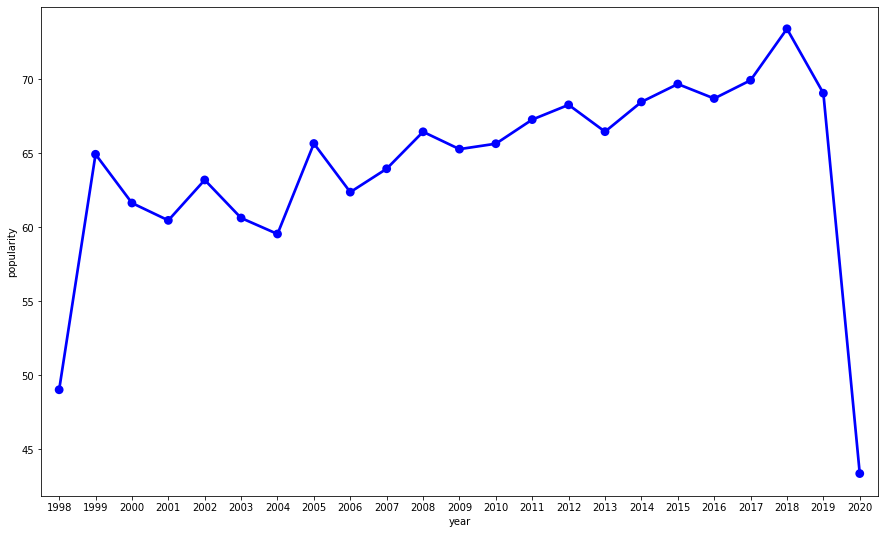

In [38]:
agrup_años = songs.groupby('year')['popularity'].mean().reset_index()
plt.figure(figsize=(15, 9))

ax = sns.pointplot(x = 'year', y = 'popularity', data=agrup_años, color = 'blue', label='tip')

* Observamos que la popularidad a lo largo de los años oscila entre los 55 y 65 puntos, exceptuando los dos años con pocos datos mencionados anteriormente (1998 y 2020) y el año 2018 que promedia por encima de los 70 puntos.

* Eliminamos los años 1998 y 2020 ya que sus muestras son muy inferiores al resto de los años. Nuestro dataset se reduce en 4 valores

In [39]:
songs = songs.drop(songs.index[songs['year']<1999])
songs = songs.drop(songs.index[songs['year']>2019])
songs.shape

(1788, 21)

* Genereamos un barplot para ver cómo es la proporción de canciones por nota que hay en el dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

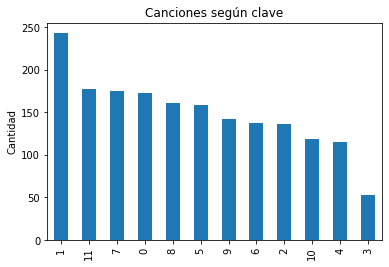

In [40]:
songs['key'].value_counts().plot(kind='bar')
plt.title('Canciones según clave')
plt.ylabel('Cantidad')
plt.xticks(rotation = 90)

* Vemos que la mayoría de las canciones están en Do#, seguidas por Si, Do y Sol. La que menos canciones tiene es re#. Vamos a complementar este análisis con la tonalidad (mayor o menor) que se encuentra en la variable 'mode'

* Genereamos un barplot para ver cómo es la proporción de canciones por modalidad o tono que hay en el dataset

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

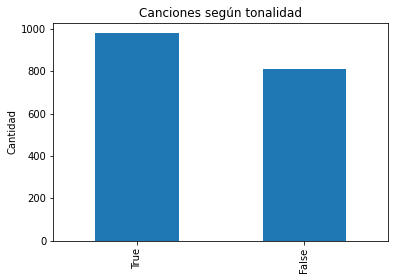

In [41]:
songs['mode'].value_counts().plot(kind='bar')
plt.title('Canciones según tonalidad')
plt.ylabel('Cantidad')
plt.xticks(rotation = 90)

* Vemos que la distribución está bastante proporcional, con mayoría de canciones en tonalidad mayor

* Comparamos la popularidad de las canciones por clave, según su tono (mayor o menor)

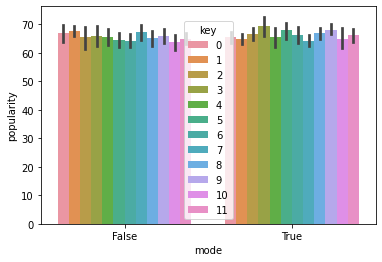

In [42]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = songs)

* Se observa a simple vista que en promedio la popularidad es pareja según el tono

* Algunas notas cambian bastante su popularidad según su tono, por ejemplo para do# (key=1) es mayor la popularidad en menor que en mayor. Caso contrario ocurre con re# que tiene mayor popularidad en mayor.

* Usamos el metodo de correlacion spearman para chequear la correlación entre variables

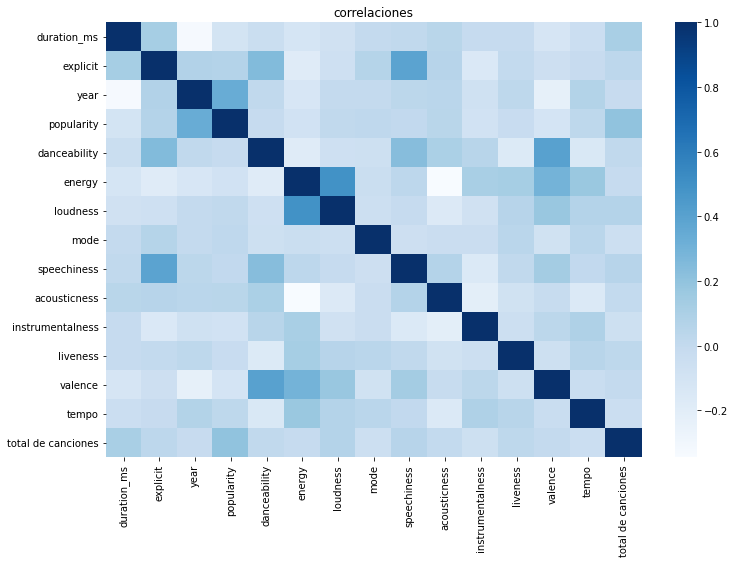

In [43]:
met_corr_spearman = songs.corr('spearman')


plt.figure(figsize=(12,8))
sns.heatmap(met_corr_spearman, cmap="Blues")
plt.title('correlaciones');

* Vemos que nuestra variable target solo presenta una correlación alta con la variable año que sin embargo no la consideramos como una numérica

* Se observan también correlaciones altas entre las siguientes variables:

  * `Explicit y speechiness`
  * `Explicit y danceability`
  * `Energy y loudness`
  * `Energy y valence`
  * `Valence y danceability`


#**----------------------------------------------------------------------------------------------------**

# **PRIMER MODELO PROPUESTO: REGRESIÓN LINEAL**

* Creamos nuestra variable target y (popularity) nuestra variable x

In [44]:
x = songs.drop("popularity", axis=1)
y = songs["popularity"]

* Spliteamos el conjunto de datos para trabajar con un train y un test

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


* Eliminamos las variables categóricas que decidimos no tener en cuenta

In [46]:
X_train.drop(['artist', 'song', 'genre', 'total de canciones'],axis=1, inplace=True)

* Creamos la variable cat_col para seleccionar las columnas categóricas y realizarles one hot encoding

In [47]:
cat_col = X_train.select_dtypes(include='O').columns.tolist()

* Generamos un pipeline para transformaciones numericas 

In [48]:
numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())])

* Generamos un pipeline para transformaciones categoricas

In [49]:
categorical_transformer = Pipeline(steps=[("ohe",OneHotEncoder(drop='first', handle_unknown="ignore"))])

* Realizamos una funcion que ejecute cada pipeline y luego los una

In [50]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, make_column_selector(dtype_exclude=object)),
        ("cat", categorical_transformer, make_column_selector(dtype_include = object)),
    ]
)
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f911bb46710>),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f911bb46750>)])

* Creamos una lista para guardar el resultado de la función para nuestro X train

In [51]:
X_array_enc = preprocessor.transform(X_train)

* Creamos el nombre de las columnas para armar un dataset con nuestra transformación

In [52]:
columns_enc = np.append(X_train.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat_col))
columns_enc

array(['duration_ms', 'explicit', 'year', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'rango canciones_10+',
       'rango canciones_5-9', 'first_genre_dance/electronic',
       'first_genre_hip hop', 'first_genre_latin', 'first_genre_metal',
       'first_genre_pop', 'first_genre_r&b', 'first_genre_rock',
       'first_genre_set()', 'first_genre_world/traditional'], dtype=object)

* Creamos un dataset con el nuevo conjunto encodeado

In [53]:
columns_enc = np.append(X_train.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat_col))
X_train_enc = pd.DataFrame(X_array_enc, columns = columns_enc, index = X_train.index)
X_train_enc

,duration_ms,explicit,year,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,rango canciones_5-9,first_genre_dance/electronic,first_genre_hip hop,first_genre_latin,first_genre_metal,first_genre_pop,first_genre_r&b,first_genre_rock,first_genre_set(),first_genre_world/traditional
1758,0.304840,1.0,0.95,0.701754,0.331448,0.322056,1.0,0.145082,0.848674,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
270,0.327009,0.0,0.65,0.736842,0.816742,0.734273,0.0,0.014671,0.001111,0.000011,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
152,0.551706,1.0,0.10,0.557644,0.626697,0.281244,1.0,0.552617,0.028127,0.000003,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1159,0.393220,0.0,0.50,0.506266,0.802036,0.666054,0.0,0.024995,0.011090,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1367,0.414570,0.0,0.60,0.502506,0.940045,0.999734,0.0,0.044014,0.002359,0.004183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,0.606307,1.0,0.80,0.850877,0.466063,0.553949,1.0,0.137294,0.414802,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1316,0.351811,0.0,0.60,0.834586,0.866516,0.662724,1.0,0.061945,0.148130,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
881,0.347661,1.0,0.50,0.679198,0.843891,0.403936,1.0,0.029524,0.047281,0.010041,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1481,0.206674,0.0,0.75,0.541353,0.871041,0.533117,1.0,0.072994,0.005492,0.000012,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


* Realizamos los mismos pasos para el conjunto test

In [54]:
X_test.drop(['artist', 'song', 'genre', 'total de canciones'],axis=1, inplace=True)

X_array_enc_test = preprocessor.transform(X_test)


columns_enc = np.append(X_test.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat_col))
X_test_enc = pd.DataFrame(X_array_enc_test, columns = columns_enc, index = X_test.index)
X_test_enc

,duration_ms,explicit,year,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,rango canciones_5-9,first_genre_dance/electronic,first_genre_hip hop,first_genre_latin,first_genre_metal,first_genre_pop,first_genre_r&b,first_genre_rock,first_genre_set(),first_genre_world/traditional
1623,0.412256,1.0,0.85,0.551378,0.511312,0.642489,1.0,0.106684,0.061778,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
957,0.435154,1.0,0.90,0.897243,0.712670,0.734956,0.0,0.060134,0.067916,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
494,0.689331,0.0,0.30,0.422306,0.885747,0.422463,0.0,0.061221,0.005142,0.035025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1373,0.472777,1.0,0.95,0.885965,0.502262,0.364661,1.0,0.174063,0.024952,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1274,0.470991,1.0,0.55,0.459900,0.753394,0.691327,1.0,0.299040,0.014793,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,0.458801,0.0,0.55,0.627820,0.705882,0.567354,1.0,0.020467,0.338610,0.000002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1687,0.499052,0.0,0.90,0.484962,0.712670,0.339815,1.0,0.518203,0.280408,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1141,0.459168,0.0,0.65,0.621554,0.727376,0.689961,1.0,0.242891,0.041249,0.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,0.599157,0.0,0.10,0.744361,0.770362,0.737005,0.0,0.094367,0.105060,0.002822,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [55]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_enc, y_train)

LinearRegression()

In [56]:
y_pred = lr.predict(X_test_enc)

In [57]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

metrics_dict = {'MAE': [mean_absolute_error(y_test, y_pred)], 'MSE': [mean_squared_error(y_test, y_pred)],
              'R2': [r2_score(y_test, y_pred)], 'MAPE': [mean_absolute_percentage_error(y_test, y_pred)]}
              
pd.DataFrame.from_dict(metrics_dict, orient='index')

,0
MAE,7.459623
MSE,97.085581
R2,0.173087
MAPE,0.130297


* Nuestro resultado usando regresión lineal no es muy bueno, vamos a probar con un modelo de random forest

# **SEGUNDO MODELO PROPUESTO: RANDOM FOREST**

* Para este modelo vamos a eliminar algunos outliers de nuestras variables numéricas para mejorar el resultado, ya que el modelo es sensible a ese tipo de datos

* Realizamos el boxplot para energy y vemos que tiene dos outliers

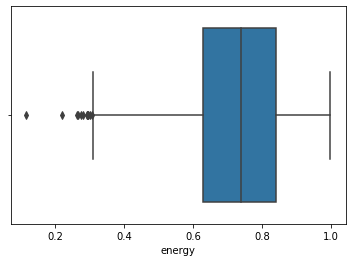

In [58]:
sns.boxplot(x=songs['energy'])

* Eliminamos los outliers, reduciendo nuestro conjunto en 3 registros

In [59]:
songs = songs.drop(songs.index[songs['energy']<0.2])
songs.shape

(1787, 21)

* Realizamos el boxplot para danceability

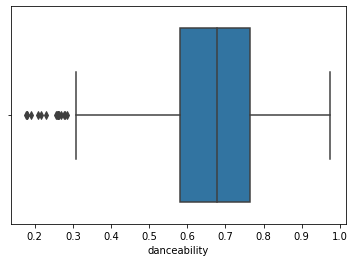

In [60]:
sns.boxplot(x=songs['danceability'])

* Eliminamos los outliers, nuestro conjunto se reduce 4 registros

In [61]:
#eliminamos los outliers, nuestro dataset se reduce en 4 valores
songs = songs.drop(songs.index[songs['danceability']<0.2])
songs.shape 

(1783, 21)

* Realizamos el boxplot para acousticness

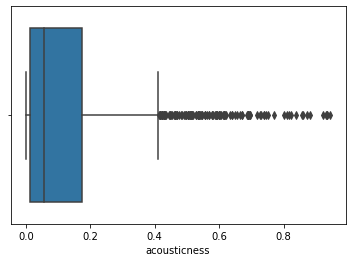

In [62]:
sns.boxplot(x=songs['acousticness'])

* Eliminamos los outliers que son los valores superiores a 0.8. Nuestro  conjunto se reduce en 14 registros

In [63]:
songs = songs.drop(songs.index[songs['acousticness']>0.8])
songs.shape 

(1769, 21)

* Realizamos el boxplot para speechiness

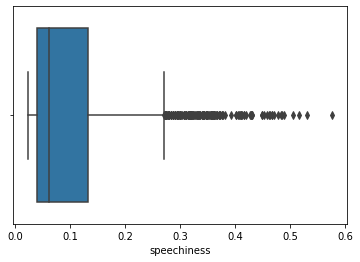

In [64]:
sns.boxplot(x=songs['speechiness'])

* Eliminamos los outliers que son los valores superiores a 0.45. Nuestro conjunto se reduce 15 registros

In [65]:
songs = songs.drop(songs.index[songs['speechiness']>0.45])
songs.shape 

(1754, 21)

* Creamos nuestra variable target y nuestra variable x

In [66]:
x = songs.drop("popularity", axis=1)
y = songs["popularity"]

* Spliteamos el dataset para trabajar con train y test

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

* Consultamos el tamaño de nuestro dataset de entrenamiento

In [68]:
X_train.shape

(1403, 20)

* Eliminamos las columnas categóricas que no vamos a tener en cuenta en nuestro modelo

In [69]:
X_train.drop(['artist', 'song', 'genre', 'total de canciones'],axis=1, inplace=True)

* Creamos una variable para agrupar nuestras variables categóricas

In [70]:
cat_col = X_train.select_dtypes(include='O').columns.tolist()

* Utilizamos la función creada en el modelo anterior para realizar las transformaciones

In [71]:
X_array_enc = preprocessor.transform(X_train)

* Creamos las columnas para luego armar el nuevo conjunto con nuestra lista transformada

In [72]:
columns_enc = np.append(X_train.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat_col))
columns_enc

array(['duration_ms', 'explicit', 'year', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'rango canciones_10+',
       'rango canciones_5-9', 'first_genre_dance/electronic',
       'first_genre_hip hop', 'first_genre_latin', 'first_genre_metal',
       'first_genre_pop', 'first_genre_r&b', 'first_genre_rock',
       'first_genre_set()', 'first_genre_world/traditional'], dtype=object)

* Creamos el conjunto encodeado

In [73]:
X_train_enc = pd.DataFrame(X_array_enc, columns = columns_enc, index = X_train.index)
X_train_enc

,duration_ms,explicit,year,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,rango canciones_5-9,first_genre_dance/electronic,first_genre_hip hop,first_genre_latin,first_genre_metal,first_genre_pop,first_genre_r&b,first_genre_rock,first_genre_set(),first_genre_world/traditional
206,0.320073,0.0,0.35,0.637845,0.762443,0.597664,0.0,0.373302,0.013206,0.014924,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1421,0.500108,0.0,0.70,0.398496,0.881222,0.589041,0.0,0.036588,0.004772,0.000605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
831,0.452602,0.0,0.30,0.630326,0.854072,0.619180,1.0,0.027893,0.281466,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1275,0.721806,1.0,0.60,0.295739,0.782805,0.701316,0.0,0.532693,0.056699,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1626,0.413608,1.0,0.90,0.825815,0.485294,0.489914,1.0,0.127513,0.042625,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,0.484706,1.0,0.60,0.575188,0.510181,0.999452,0.0,0.148705,0.386230,0.000358,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1335,0.385129,0.0,0.60,0.380952,0.830317,0.561975,1.0,0.026444,0.001745,0.000002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
895,0.403046,0.0,0.35,0.436090,0.523756,0.610471,1.0,0.174063,0.013947,0.009299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1507,0.664320,0.0,0.75,0.756892,0.373303,0.482571,1.0,0.010143,0.501576,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


* Realizamos los mismos pasos para el conjunto test

In [74]:
X_test.drop(['artist', 'song', 'genre', 'total de canciones'],axis=1, inplace=True)

X_array_enc_test = preprocessor.transform(X_test)


columns_enc = np.append(X_test.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat_col))
X_test_enc = pd.DataFrame(X_array_enc_test, columns = columns_enc, index = X_test.index)
X_test_enc

,duration_ms,explicit,year,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,rango canciones_5-9,first_genre_dance/electronic,first_genre_hip hop,first_genre_latin,first_genre_metal,first_genre_pop,first_genre_r&b,first_genre_rock,first_genre_set(),first_genre_world/traditional
329,0.465895,0.0,0.10,0.870927,0.851810,0.740848,0.0,0.174063,0.161886,0.000023,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,0.401840,1.0,0.35,0.602757,0.493213,0.999498,1.0,0.626879,0.004529,0.000110,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416,0.832789,1.0,0.15,0.590226,0.728507,0.631646,1.0,0.510958,0.015005,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
476,0.551655,0.0,0.35,0.537594,0.538462,0.382932,0.0,0.114291,0.079980,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1575,0.323963,0.0,0.80,0.437343,0.845023,0.487523,1.0,0.120630,0.015217,0.060609,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,0.211265,1.0,0.95,0.705514,0.563348,0.999647,1.0,0.219344,0.273000,0.003777,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
733,0.532844,1.0,0.20,0.671679,0.700226,0.582210,0.0,0.545372,0.579885,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
452,0.470991,0.0,0.15,0.726817,0.752262,0.569916,1.0,0.534505,0.085800,0.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1274,0.470991,1.0,0.55,0.459900,0.753394,0.691327,1.0,0.299040,0.014793,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Creamos el clasificador y entrenamos el modelo usando el conjunto de entrenamiento

In [75]:
classifier = RandomForestRegressor(n_estimators=100)


classifier.fit(X_train_enc, y_train)

RandomForestRegressor()

* Creamos la predicción usando nuestro conjunto test

In [76]:
y_pred = classifier.predict(X_test_enc)

* Comparamos en nuestro conjunto el resulto predecido y el resultado verdadero

In [77]:
X_test['pred'] = y_pred
X_test['target'] = y_test
X_test.head(20)

,duration_ms,explicit,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,rango canciones,first_genre,pred,target
329,231213,False,2001,0.872,0.868,10,-3036.00,False,0.1200,0.153000,0.000023,0.8430,0.822,105.005,0-4,hip hop,54.67,60
419,214960,True,2006,0.658,0.551,1,-6.62,True,0.3700,0.004300,0.000108,0.1970,0.442,138.335,0-4,hip hop,60.84,61
416,324306,True,2002,0.648,0.759,6,-4315.00,True,0.3060,0.014200,0.000000,0.6480,0.518,85.996,0-4,hip hop,65.63,68
476,252973,False,2006,0.606,0.591,0,-7228.00,False,0.0870,0.075600,0.000000,0.3280,0.477,95.802,10+,pop,65.98,66
1575,195200,False,2015,0.526,0.862,2,-6003.00,True,0.0905,0.014400,0.059700,0.2290,0.528,90.052,0-4,hip hop,71.00,75
1633,202620,True,2018,0.626,0.880,9,-2384.00,False,0.0504,0.205000,0.000000,0.1280,0.534,95.079,5-9,pop,71.85,78
1472,224813,False,2016,0.592,0.800,6,-4931.00,False,0.2150,0.056100,0.000002,0.0775,0.728,89.972,0-4,pop,69.86,67
832,255626,False,2005,0.366,0.940,1,-5119.00,False,0.0696,0.000769,0.000094,0.1880,0.369,130.198,0-4,rock,68.50,76
1709,220293,True,2016,0.630,0.804,6,-4183.00,True,0.0363,0.215000,0.000000,0.2530,0.492,123.146,5-9,hip hop,72.42,81
1135,178426,False,2019,0.552,0.702,9,-5707.00,True,0.1570,0.117000,0.000021,0.1050,0.564,169.994,10+,pop,70.50,78


* Consultamos la métrica R2 para nuestro modelo

In [78]:
r2_score(y_test,y_pred)

0.1951000072290905

* Vemos la importancia que tiene cada feature en el modelo creado

In [79]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train_enc.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

,feature,importance
2,year,0.135564
0,duration_ms,0.080730
3,danceability,0.079295
4,energy,0.077772
5,loudness,0.071785
12,tempo,0.071762
8,acousticness,0.070333
10,liveness,0.069200
11,valence,0.062449
7,speechiness,0.061767


* Con este modelo nuestro r2 empeoró un poco, seguimos lejos de un buen resultado. Vamos a salir de la regresión lineal para probar con regresión logística y agrupamientos para ver si mejoramos nuestro rendimiento

# **MODELO 3: REGRESIÓN LOGÍSTICA**

* Creamos una función para armar un target para nuestro modelo. Vamos a intentar predecir si una canción alcanza o supera el índice de 75 puntos de popularidad

In [80]:
def clasificar(x):
  if x >= 75:
    return 1
  else:
    return 0



In [81]:
songs['target'] = songs['popularity'].apply(clasificar)

In [82]:
songs.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,genre,total de canciones,rango canciones,first_genre,target
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5444.00,...,0.3000,0.000018,0.3550,0.894,95.053,pop,18,10+,pop,1
1,Britney Spears,Born to Make You Happy,243533,False,1999,58,0.633,0.922,11,-4842.00,...,0.1160,0.000465,0.0710,0.686,84.110,pop,18,10+,pop,0
2,Britney Spears,Lucky,206226,False,2000,65,0.765,0.791,8,-5707.00,...,0.2620,0.000154,0.0669,0.966,95.026,pop,18,10+,pop,0
3,Britney Spears,I'm a Slave 4 U,203600,False,2001,69,0.847,0.843,5,-3579.00,...,0.4150,0.000134,0.1070,0.963,110.027,pop,18,10+,pop,0
4,Britney Spears,Overprotected - Radio Edit,198600,False,2001,61,0.682,0.894,0,-1.73,...,0.0381,0.000000,0.4160,0.845,95.992,pop,18,10+,pop,0


* Consultamos la proporción de los valores posibles de nuestro target en el conjunto

In [83]:
songs.target.value_counts(normalize=True)

0    0.776511
1    0.223489
Name: target, dtype: float64

* Creamos nuestras variables x e y, y luego spliteamos el conjunto para tener un train y un test

In [84]:
y = songs['target']
X = songs.drop('target', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=50, stratify=y)

* Eliminamos las columnas que no vamos a tener en cuenta para nuestro modelo

In [85]:
X_train.drop(['artist', 'song', 'genre', 'popularity', 'total de canciones'],axis=1, inplace=True)

* Creamos una variable para agrupar nuestras columnas categóricas

In [86]:
cat_col = X_train.select_dtypes(include='O').columns.tolist()

* Usamos la función creada en nuestro primer modelo para realizar las transformaciones

In [87]:
X_array_enc = preprocessor.transform(X_train)

* Creamos las columnas que vamos a unir con nuestra lista transformada para obtener el nuevo conjunto

In [88]:
columns_enc = np.append(X_train.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat_col))
columns_enc

array(['duration_ms', 'explicit', 'year', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'rango canciones_10+',
       'rango canciones_5-9', 'first_genre_dance/electronic',
       'first_genre_hip hop', 'first_genre_latin', 'first_genre_metal',
       'first_genre_pop', 'first_genre_r&b', 'first_genre_rock',
       'first_genre_set()', 'first_genre_world/traditional'], dtype=object)

* Creamos el conjunto encodeado

In [89]:
X_train_enc = pd.DataFrame(X_array_enc, columns = columns_enc, index = X_train.index)
X_train_enc

,duration_ms,explicit,year,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,rango canciones_5-9,first_genre_dance/electronic,first_genre_hip hop,first_genre_latin,first_genre_metal,first_genre_pop,first_genre_r&b,first_genre_rock,first_genre_set(),first_genre_world/traditional
536,0.554701,0.0,0.60,0.461153,0.604072,0.653247,1.0,0.015396,0.151304,0.000016,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
640,0.342301,1.0,0.25,0.938596,0.906109,0.810433,0.0,0.124977,0.370357,0.000006,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41,0.663374,1.0,0.30,0.552632,0.713801,0.532519,0.0,0.594276,0.058498,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
472,0.691014,0.0,0.15,0.560150,0.609729,0.438088,0.0,0.288172,0.610574,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1474,0.435048,0.0,0.75,0.857143,0.407240,0.385750,0.0,0.044919,0.009132,0.120812,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.258642,1.0,1.00,0.753133,0.228507,0.083758,0.0,0.561674,0.626447,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1048,0.789594,0.0,0.45,0.224311,0.962670,0.999711,0.0,0.106140,0.000255,0.150254,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261,0.380187,1.0,0.70,0.687970,0.769231,0.602787,1.0,0.009237,0.143897,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1057,0.252963,1.0,1.00,0.889724,0.735294,0.555486,1.0,0.077884,0.009661,0.000885,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Realizamos los mismos pasos para el conjunto test

In [90]:
X_test.drop(['artist', 'song', 'genre', 'popularity', 'total de canciones'],axis=1, inplace=True)

X_array_enc_test = preprocessor.transform(X_test)


columns_enc = np.append(X_test.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat_col))
X_test_enc = pd.DataFrame(X_array_enc_test, columns = columns_enc, index = X_test.index)
X_test_enc

,duration_ms,explicit,year,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,rango canciones_5-9,first_genre_dance/electronic,first_genre_hip hop,first_genre_latin,first_genre_metal,first_genre_pop,first_genre_r&b,first_genre_rock,first_genre_set(),first_genre_world/traditional
973,0.297529,1.0,0.40,0.830827,0.515837,0.366454,1.0,0.101069,0.169294,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1449,0.449394,0.0,0.70,0.586466,0.863122,0.726162,0.0,0.161384,0.311096,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1229,0.299957,0.0,0.55,0.773183,0.674208,0.562573,0.0,0.083318,0.317445,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
89,0.613294,0.0,0.50,0.395990,0.783937,0.712757,0.0,0.022279,0.000227,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
290,0.319336,0.0,0.10,0.601504,0.961538,0.763473,0.0,0.057417,0.030138,0.000090,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.321649,1.0,0.80,0.436090,0.359729,0.095199,1.0,0.291795,0.113208,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,0.336361,0.0,0.05,0.754386,0.813348,0.763303,1.0,0.250136,0.036275,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
976,0.617444,1.0,0.80,0.850877,0.558824,0.383359,1.0,0.105959,0.008455,0.000083,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
471,0.607986,0.0,0.15,0.895990,0.677602,0.483084,0.0,0.212099,0.212681,0.000238,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


* Importamos el modelo

In [91]:
from sklearn.linear_model import LogisticRegression

* Creamos el clasificador y entrenamos el modelo usando el conjunto de entrenamiento

In [92]:
clf = LogisticRegression(C=1, n_jobs=-1, random_state=34)
clf.fit(X_train_enc, y_train)

LogisticRegression(C=1, n_jobs=-1, random_state=34)

In [93]:
predictions = clf.predict(X_train_enc)

In [94]:
from sklearn.metrics import confusion_matrix, classification_report

In [95]:
confusion_matrix(y_train, predictions)

array([[1058,   31],
       [ 269,   45]])

In [96]:
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1089
           1       0.59      0.14      0.23       314

    accuracy                           0.79      1403
   macro avg       0.69      0.56      0.55      1403
weighted avg       0.75      0.79      0.73      1403



* Creamos las predicciones usando nuestro conjunto test

In [97]:
predictions = clf.predict(X_test_enc)

* Vemos en nuestro conjunto las predicciones realizadas al lado de los valores correctos

In [98]:
X_test_enc['pred'] = predictions
X_test_enc['target'] = y_test
X_test_enc.head(20)

,duration_ms,explicit,year,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,first_genre_hip hop,first_genre_latin,first_genre_metal,first_genre_pop,first_genre_r&b,first_genre_rock,first_genre_set(),first_genre_world/traditional,pred,target
973,0.297529,1.0,0.40,0.830827,0.515837,0.366454,1.0,0.101069,0.169294,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1449,0.449394,0.0,0.70,0.586466,0.863122,0.726162,0.0,0.161384,0.311096,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
1229,0.299957,0.0,0.55,0.773183,0.674208,0.562573,0.0,0.083318,0.317445,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
89,0.613294,0.0,0.50,0.395990,0.783937,0.712757,0.0,0.022279,0.000227,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
290,0.319336,0.0,0.10,0.601504,0.961538,0.763473,0.0,0.057417,0.030138,0.000090,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
1133,0.389595,0.0,0.90,0.738095,0.671946,0.447565,0.0,0.179496,0.215856,0.000014,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
628,0.348764,0.0,0.55,0.682957,0.730769,0.619351,0.0,0.042746,0.012359,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
1816,0.298109,0.0,1.00,0.710526,0.763575,0.605861,0.0,0.058504,0.057863,0.000814,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
1760,0.269098,0.0,0.90,0.624060,0.719457,0.697901,1.0,0.010324,0.063895,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
411,0.510718,0.0,0.10,0.744361,0.622172,0.662468,1.0,0.020105,0.014264,0.012487,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0


* Importamos las métricas matriz de confusión y reporte de clasificación, y observamos la performance de nuestro modelo


In [99]:
from sklearn.metrics import confusion_matrix, classification_report

In [100]:
confusion_matrix(y_test, predictions)

array([[268,   5],
       [ 70,   8]])

In [101]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       273
           1       0.62      0.10      0.18        78

    accuracy                           0.79       351
   macro avg       0.70      0.54      0.53       351
weighted avg       0.75      0.79      0.72       351



* Con Regresión Logística nuestro modelo mejoró su performance considerablemente, probaremos ahora con máquinas de soporte vectorial

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [116]:
model = LogisticRegression()

In [117]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [118]:
from scipy.stats import loguniform

In [119]:
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

In [120]:
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

In [121]:
result = search.fit(X_train_enc, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7871175278622088
Best Hyperparameters: {'C': 0.21148966102391084, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
7080 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1590 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError:

# **MODELO 4: SVM**

* Definimos nuestras variables x e y, y luego spliteamos el conjunto de datos para tener un train y un test

In [122]:
y = songs['target']
X = songs.drop('target', axis=1)


from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=10, stratify=y)

* Eliminamos las columnas que no vamos a tener en cuenta en el modelo, fundamentalmente 'popularity' ya que ahora creamos un nuevo target

In [123]:
X_train.drop(['artist', 'song', 'genre', 'popularity', 'total de canciones'],axis=1, inplace=True)

* Creamos una variable para agrupar nuestras columnas categóricas

In [124]:
cat_col = X_train.select_dtypes(include='O').columns.tolist()

* Usamos la función para realizar las transformaciones

In [125]:
X_array_enc = preprocessor.transform(X_train)

* Creamos los nombres de las columnas para armar el nuevo conjunto con nuestra lista transformada

In [126]:
columns_enc = np.append(X_train.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat_col))
columns_enc

array(['duration_ms', 'explicit', 'year', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'rango canciones_10+',
       'rango canciones_5-9', 'first_genre_dance/electronic',
       'first_genre_hip hop', 'first_genre_latin', 'first_genre_metal',
       'first_genre_pop', 'first_genre_r&b', 'first_genre_rock',
       'first_genre_set()', 'first_genre_world/traditional'], dtype=object)

* Creamos el conjunto encodeado para el train

In [127]:
X_train_enc = pd.DataFrame(X_array_enc, columns = columns_enc, index = X_train.index)
X_train_enc

,duration_ms,explicit,year,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,rango canciones_5-9,first_genre_dance/electronic,first_genre_hip hop,first_genre_latin,first_genre_metal,first_genre_pop,first_genre_r&b,first_genre_rock,first_genre_set(),first_genre_world/traditional
399,0.518285,0.0,0.15,0.511278,0.747738,0.496488,1.0,0.039848,0.060509,0.000008,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
371,0.467681,0.0,0.05,0.467419,0.779412,0.554547,1.0,0.005796,0.015640,0.000044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1087,0.275881,0.0,1.00,0.774436,0.430995,0.497769,1.0,0.087484,0.114266,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1609,0.528745,0.0,0.90,0.551378,0.588235,0.422122,0.0,0.014128,0.052678,0.000015,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
624,0.400945,0.0,0.20,0.581454,0.373303,0.259472,1.0,0.023365,0.153421,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.495954,0.0,0.25,0.697995,0.625566,0.664090,0.0,0.019924,0.055641,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
459,0.607568,0.0,0.10,0.390977,0.726244,0.653247,0.0,0.124434,0.010359,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,0.191169,1.0,0.00,0.933584,0.898190,0.792674,0.0,0.445753,0.029714,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
981,0.442879,0.0,0.40,0.733083,0.617647,0.481376,0.0,0.081145,0.158712,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Realizamos los mismos pasos para el test

In [128]:
X_test.drop(['artist', 'song', 'genre', 'popularity', 'total de canciones'],axis=1, inplace=True)

X_array_enc_test = preprocessor.transform(X_test)


columns_enc = np.append(X_test.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat_col))
X_test_enc = pd.DataFrame(X_array_enc_test, columns = columns_enc, index = X_test.index)
X_test_enc

,duration_ms,explicit,year,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,rango canciones_5-9,first_genre_dance/electronic,first_genre_hip hop,first_genre_latin,first_genre_metal,first_genre_pop,first_genre_r&b,first_genre_rock,first_genre_set(),first_genre_world/traditional
1223,0.429846,0.0,0.45,0.354637,0.770362,0.615765,0.0,0.017026,0.001111,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
711,0.356647,1.0,0.40,0.614035,0.714932,0.397361,1.0,0.299040,0.356600,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,0.456803,0.0,0.35,0.858396,0.709276,0.596896,1.0,0.358812,0.003957,0.008680,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
375,0.567628,0.0,0.15,0.640351,0.478507,0.350487,1.0,0.009600,0.533323,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1469,0.440778,0.0,0.75,0.746867,0.727376,0.573758,1.0,0.025720,0.044635,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0.464055,0.0,0.65,0.591479,0.791855,0.675958,0.0,0.031878,0.001301,0.000044,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
959,0.457899,0.0,1.00,0.789474,0.873303,0.631987,0.0,0.022097,0.016910,0.000511,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,0.403992,0.0,0.10,0.565163,0.813348,0.458665,0.0,0.046731,0.426443,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
725,0.441827,1.0,0.25,0.815789,0.608597,0.466861,0.0,0.074986,0.226438,0.000003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


* Importamos el algoritmo y entrenamos

In [129]:
from sklearn.svm import SVC

classifier = SVC(kernel= 'linear')

classifier.fit(X_train_enc, y_train)

SVC(kernel='linear')

* Predecimos los resultados

In [130]:
pred = classifier.predict(X_test_enc)

* Comparamos la predicción con los resultados verdaderos

In [131]:
testing = pd.DataFrame({'y_true':y_test, 'pred':pred})

In [132]:
testing

,y_true,pred
1223,0,0
711,0,0
205,0,0
375,0,0
1469,1,0
...,...,...
1015,0,0
959,0,0
134,0,0
725,0,0


* Consultamos las métricas del modelo

In [133]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testing['y_true'], testing['pred']))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       273
           1       0.00      0.00      0.00        78

    accuracy                           0.77       351
   macro avg       0.39      0.50      0.44       351
weighted avg       0.60      0.77      0.68       351



* Nuestro resultado es prácticamente el mismo que con regresión logística. Vamos a probar ahora con un modelo de agrupamiento para ver si podemos obtener mejores resultados

# **5. AGRUPAMIENTO**

 * Comenzamos por crear un nuevo target, dividiendo la variable popularity en 3 labels

In [134]:
pd.cut(songs['popularity'], bins=3)

0         (64.667, 89.0]
1       (40.333, 64.667]
2         (64.667, 89.0]
3         (64.667, 89.0]
4       (40.333, 64.667]
              ...       
1812      (64.667, 89.0]
1813      (64.667, 89.0]
1815      (64.667, 89.0]
1816    (40.333, 64.667]
1817      (64.667, 89.0]
Name: popularity, Length: 1754, dtype: category
Categories (3, interval[float64, right]): [(15.927, 40.333] < (40.333, 64.667] < (64.667, 89.0]]

* Nombramos cada división según popularidad baja, media o alta

In [135]:
pd.cut(songs['popularity'], bins=3, labels = ["baja", "media","alta"]).value_counts()

alta     1016
media     699
baja       39
Name: popularity, dtype: int64

* Reemplazamos los valroes de nuestra columna popularity por el label creado anteriormente

In [136]:
songs['popularity'] = pd.cut(songs['popularity'], bins=3, labels = ["baja", "media","alta"], right = True)

In [137]:
songs.head(20)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,genre,total de canciones,rango canciones,first_genre,target
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,alta,0.751,0.834,1,-5444.00,...,0.30000,0.000018,0.3550,0.894,95.053,pop,18,10+,pop,1
1,Britney Spears,Born to Make You Happy,243533,False,1999,media,0.633,0.922,11,-4842.00,...,0.11600,0.000465,0.0710,0.686,84.110,pop,18,10+,pop,0
2,Britney Spears,Lucky,206226,False,2000,alta,0.765,0.791,8,-5707.00,...,0.26200,0.000154,0.0669,0.966,95.026,pop,18,10+,pop,0
3,Britney Spears,I'm a Slave 4 U,203600,False,2001,alta,0.847,0.843,5,-3579.00,...,0.41500,0.000134,0.1070,0.963,110.027,pop,18,10+,pop,0
4,Britney Spears,Overprotected - Radio Edit,198600,False,2001,media,0.682,0.894,0,-1.73,...,0.03810,0.000000,0.4160,0.845,95.992,pop,18,10+,pop,0
5,Britney Spears,"I'm Not a Girl, Not Yet a Woman",231066,False,2001,media,0.534,0.543,3,-6857.00,...,0.57900,0.000000,0.1120,0.418,78.996,pop,18,10+,pop,0
6,Britney Spears,Me Against the Music (feat. Madonna) - LP Vers...,223773,False,2003,media,0.804,0.836,6,-6635.00,...,0.32000,0.000000,0.2130,0.850,120.046,pop,18,10+,pop,0
7,Britney Spears,Toxic,198800,False,2003,alta,0.774,0.838,5,-3914.00,...,0.02490,0.025000,0.2420,0.924,143.040,pop,18,10+,pop,1
8,Britney Spears,My Prerogative,213893,False,2004,media,0.749,0.938,10,-4423.00,...,0.01270,0.000002,0.1030,0.619,111.014,pop,18,10+,pop,0
10,Britney Spears,Gimme More,251240,False,2007,alta,0.788,0.844,2,-3131.00,...,0.25000,0.000678,0.0723,0.382,113.324,pop,18,10+,pop,1


* Consultamos la proporción en el dataset de los valores que puede tomar popularity

In [138]:
songs.popularity.value_counts(normalize=True)

alta     0.579247
media    0.398518
baja     0.022235
Name: popularity, dtype: float64

* Vemos que contamos con un muy bajo porcentaje para el valor de popularity 'low'

* Creamos las variables x e y

In [139]:
y = songs['popularity']
X = songs.drop('popularity', axis=1)

* Spliteamos el conjunto en entrenamiento y test

In [140]:
X_train , X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=99, stratify=y)

* Eliminamos las columnas que no vamos a tener en cuenta

In [141]:
X_train.drop(['artist', 'song', 'genre', 'target', 'total de canciones'],axis=1, inplace=True)

* Creamos una nueva variable para agrupar nuestras columnas categóricas

In [142]:
cat_col = X_train.select_dtypes(include='O').columns.tolist()

* Usamos la función creada en el primer modelo para realizar las transformaciones

In [143]:
X_array_enc = preprocessor.transform(X_train)

* Creamos el conjunto encode para el train

In [144]:
columns_enc = np.append(X_train.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat_col))
columns_enc

array(['duration_ms', 'explicit', 'year', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'rango canciones_10+',
       'rango canciones_5-9', 'first_genre_dance/electronic',
       'first_genre_hip hop', 'first_genre_latin', 'first_genre_metal',
       'first_genre_pop', 'first_genre_r&b', 'first_genre_rock',
       'first_genre_set()', 'first_genre_world/traditional'], dtype=object)

In [145]:
X_train_enc = pd.DataFrame(X_array_enc, columns = columns_enc, index = X_train.index)
X_train_enc

,duration_ms,explicit,year,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,rango canciones_5-9,first_genre_dance/electronic,first_genre_hip hop,first_genre_latin,first_genre_metal,first_genre_pop,first_genre_r&b,first_genre_rock,first_genre_set(),first_genre_world/traditional
10,0.544825,0.0,0.40,0.765664,0.824661,0.732736,1.0,0.017207,0.264534,0.000688,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
758,0.441984,0.0,0.65,0.484962,0.673077,0.999643,0.0,0.040210,0.001301,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,0.636259,1.0,0.30,0.984962,0.597285,0.506136,0.0,0.168629,0.053630,0.000050,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539,0.471204,1.0,0.85,0.749373,0.546380,0.379005,1.0,0.053613,0.001830,0.000005,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1515,0.224117,0.0,0.75,0.604010,0.900452,0.999869,1.0,0.099076,0.162945,0.000309,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.492431,0.0,0.60,0.646617,0.667421,0.509381,1.0,0.077160,0.024106,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
733,0.532844,1.0,0.20,0.671679,0.700226,0.582210,0.0,0.545372,0.579885,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0.365002,0.0,0.40,0.558897,0.921946,0.548827,1.0,0.015396,0.014899,0.000002,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
725,0.441827,1.0,0.25,0.815789,0.608597,0.466861,0.0,0.074986,0.226438,0.000003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


* Realizamos los mismos pasos para el test

In [146]:
X_test.drop(['artist', 'song', 'genre', 'target', 'total de canciones'],axis=1, inplace=True)

X_array_enc_test = preprocessor.transform(X_test)


columns_enc = np.append(X_test.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(cat_col))
X_test_enc = pd.DataFrame(X_array_enc_test, columns = columns_enc, index = X_test.index)
X_test_enc

,duration_ms,explicit,year,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,rango canciones_5-9,first_genre_dance/electronic,first_genre_hip hop,first_genre_latin,first_genre_metal,first_genre_pop,first_genre_r&b,first_genre_rock,first_genre_set(),first_genre_world/traditional
1654,0.357407,1.0,0.85,0.515038,0.664027,0.635403,1.0,0.046550,0.110034,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
57,0.426168,0.0,0.10,0.692982,0.550905,0.677154,0.0,0.329832,0.383055,0.000004,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
451,0.388858,0.0,0.15,0.699248,0.802036,0.646331,0.0,0.021916,0.650786,0.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1083,0.540355,0.0,0.45,0.664160,0.688914,0.668189,0.0,0.049085,0.047387,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1154,0.465738,1.0,0.45,0.538847,0.755656,0.999687,1.0,0.028618,0.000701,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,0.449579,0.0,0.80,0.412281,0.780543,0.648380,1.0,0.041659,0.007502,0.001959,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1780,0.261886,1.0,0.95,0.769424,0.533937,0.566757,0.0,0.031516,0.430675,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
364,0.348922,0.0,0.10,0.511278,0.664027,0.510491,1.0,0.015577,0.569303,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
940,0.869733,0.0,0.40,0.764411,0.783937,0.534397,1.0,0.049266,0.015111,0.260914,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Importamos el algoritmo

In [147]:
from sklearn.neighbors import KNeighborsClassifier



In [148]:
knn = KNeighborsClassifier(n_neighbors=1)

* Realizamos el entrenamiento con nuestro conjunto train

In [149]:
knn.fit(X_train_enc, y_train)

KNeighborsClassifier(n_neighbors=1)

* Guardamos las predicciones realizadas en el entrenamiento

In [150]:
y_pred_class = knn.predict(X_train_enc)

* Calculamos la métrica de nuestro conjunto train

In [151]:
from sklearn import metrics

print(metrics.accuracy_score(y_train, y_pred_class))

0.9978617248752673


* Realizamos las predicciones para nuestro conjunto test

In [152]:
y_pred_class = knn.predict(X_test_enc)


* Calculamos la métrica de nuestro conjunto test

In [153]:
#calculamos las métricas
print(metrics.accuracy_score(y_test, y_pred_class))

0.5783475783475783


* Nuestro modelo es muy bueno con el conjunto de entrenamiento pero no muy bueno con el conjunto test

In [154]:
from sklearn.model_selection import cross_val_score

In [155]:
k_range = range(1, 25)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train_enc, y_train, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.585144890696492, 0.573795119471276, 0.5958566344687342, 0.6144051855617692, 0.5994331469242501, 0.6080071174377224, 0.5994458566344687, 0.616560752414845, 0.5944458566344688, 0.6072775800711744, 0.6051423487544485, 0.6037163192679207, 0.601578546009151, 0.6072826639552618, 0.6151245551601423, 0.6058439247585155, 0.6072572445348247, 0.595849008642603, 0.602262328418912, 0.6101169293340112, 0.6029766141331978, 0.6036985256736147, 0.6086807320793086, 0.5994280630401626]


In [156]:
k_dict=dict(zip(k_range,k_scores))
k_dict

{1: 0.585144890696492,
 2: 0.573795119471276,
 3: 0.5958566344687342,
 4: 0.6144051855617692,
 5: 0.5994331469242501,
 6: 0.6080071174377224,
 7: 0.5994458566344687,
 8: 0.616560752414845,
 9: 0.5944458566344688,
 10: 0.6072775800711744,
 11: 0.6051423487544485,
 12: 0.6037163192679207,
 13: 0.601578546009151,
 14: 0.6072826639552618,
 15: 0.6151245551601423,
 16: 0.6058439247585155,
 17: 0.6072572445348247,
 18: 0.595849008642603,
 19: 0.602262328418912,
 20: 0.6101169293340112,
 21: 0.6029766141331978,
 22: 0.6036985256736147,
 23: 0.6086807320793086,
 24: 0.5994280630401626}

In [157]:
max(k_dict, key= k_dict.get)

8

Text(0, 0.5, 'Cross-Validated Accuracy')

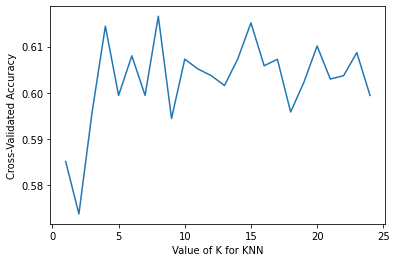

In [158]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [159]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

        alta       0.65      0.65      0.65       203
        baja       0.00      0.00      0.00         8
       media       0.50      0.51      0.51       140

    accuracy                           0.58       351
   macro avg       0.38      0.39      0.38       351
weighted avg       0.57      0.58      0.58       351



In [160]:
from sklearn.model_selection import RandomizedSearchCV
k_range2 = range(1, 22)
param_dist = dict(n_neighbors=k_range2)

In [161]:
rand = RandomizedSearchCV(knn, param_dist, cv=5, scoring='accuracy', n_iter=5, random_state=5)

In [162]:
rand.fit(X_train_enc, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
                   n_iter=5, param_distributions={'n_neighbors': range(1, 22)},
                   random_state=5, scoring='accuracy')

In [163]:
rand.cv_results_

{'mean_fit_time': array([0.00904989, 0.01166291, 0.00543251, 0.01351118, 0.00981536]),
 'std_fit_time': array([0.00327066, 0.00138513, 0.0001806 , 0.00482609, 0.0061695 ]),
 'mean_score_time': array([0.06062808, 0.06643004, 0.03611045, 0.04730053, 0.0503561 ]),
 'std_score_time': array([0.02269288, 0.01251702, 0.01461878, 0.01148069, 0.01264784]),
 'param_n_neighbors': masked_array(data=[3, 18, 20, 21, 19],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 18},
  {'n_neighbors': 20},
  {'n_neighbors': 21},
  {'n_neighbors': 19}],
 'split0_test_score': array([0.61565836, 0.56939502, 0.5658363 , 0.55871886, 0.5658363 ]),
 'split1_test_score': array([0.59074733, 0.62633452, 0.63701068, 0.64412811, 0.63701068]),
 'split2_test_score': array([0.59430605, 0.61565836, 0.63345196, 0.62989324, 0.62989324]),
 'split3_test_score': array([0.55714286, 0.56428571, 0.575     , 0.56428571, 0.5642

In [164]:
print(rand.best_score_) #single best score achieved across all params 
print(rand.best_params_) #Dictionary containing the parameters (k) used to generate that score
print(rand.best_estimator_) #estimator which gave the highest score 

0.6101169293340112
{'n_neighbors': 20}
KNeighborsClassifier(n_neighbors=20)


In [165]:
from sklearn.metrics import confusion_matrix

In [166]:
cmat = confusion_matrix(y_test, y_pred_class)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - Flase Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Score: {}'.format(np.divide(np.sum([cmat[0,0], cmat[1,1], cmat[2,2]]), np.sum(cmat)))) 
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[1,0], cmat[0,1], cmat[0,2], cmat[2,0], cmat[1,2], cmat[2,1]]), np.sum(cmat))))

TP - True Negative 131
FP - Flase Positive 4
FN - False Negative 3
TP - True Positive 0
Accuracy Score: 0.5783475783475783
Misclassification Rate: 0.42165242165242167
